# 1- Introduction

In today's data-driven business landscape, understanding customers' behaviors and preferences is paramount to success. Customer segmentation, a powerful analytical technique, allows businesses to group their customer base into distinct categories based on shared characteristics. One such method, RFM analysis, focuses on three essential dimensions of customer interaction: Recency, Frequency, and Monetary Value. By employing RFM analysis, organizations can gain profound insights into their customer base and tailor their strategies for maximum impact.

### Problem Statement
In a highly competitive marketplace, companies are challenged with retaining and growing their customer base. One-size-fits-all marketing approaches are no longer effective, and businesses need to identify and address the unique needs of different customer segments. The problem lies in how to leverage data effectively to segment customers and develop targeted strategies that resonate with each segment.

### Project Objectives

This RFM analysis and customer segmentation project aims to achieve the following objectives:

Segmentation: Utilize RFM analysis to segment customers into distinct groups based on their Recency, Frequency, and Monetary Value.

Insight Generation: Gain actionable insights into the characteristics and behaviors of each customer segment to understand their unique needs and preferences.

Strategy Development: Develop tailored marketing and engagement strategies for each customer segment to improve customer retention, satisfaction, and overall business performance.

### Data Source
The full dataset as well as the description of the features can be found here:<br> [Brazilian E-Commerce Public Dataset by Olist](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce)

### Methodology
Our approach to solving this problem involves the following steps:

1. Calculating Recency, Frequency and Monetary values for each customer: Based on the data available, these three metrics will be calculated
2. Customer Segmentation - Clustering: Based on RFM values, a clustering technique (K-Means) will be used to segment the customer base in 3 groups
3. Strategy development - Recommendations: Based on the characteristics of each group, there will be personalized strategies to increase the business' gains on each one of them

### Structure of the Report
This report is organized as follows:

1. Introduction: This section provides an overview of the project's objectives and methodology.
2. Calculating Recency, Frequency and Monetary values for each customer: as described in the previous section
3. Customer Segmentation - Clustering: as described in the previous section
4. Strategy development - Recommendations: as described in the previous section
5. Conclusion: We summarize our findings, highlight the implications of the use of RFM analysis in a business context, and describe the next steps.

### Importing Libraries

In [1]:
# Data Wrangling
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Dates
from datetime import datetime

# Clustering
from sklearn.cluster import KMeans

# Scaling
from sklearn.preprocessing import StandardScaler

# General Settings
import warnings
warnings.filterwarnings('ignore')

# 2- Calculating Recency, Frequency and Monetary values for each customer

We'll define Recency in months since last purchase, Frequency as the number of purchases made in the period of the analysis (entire data collection) and Monetary value as the customer's average ticket (not including shipping fee).

In [2]:
# Import datasets
customers = pd.read_csv('D:/DataScience/olist_datasets/olist_customers_dataset.csv')
orders = pd.read_csv('D:/DataScience/olist_datasets/olist_orders_dataset.csv')
order_items = pd.read_csv('D:/DataScience/olist_datasets/olist_order_items_dataset.csv')

In [3]:
# Join datasets customers and orders
customer_orders = pd.merge(customers, orders, on = 'customer_id')
customer_orders

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00


In [4]:
# Selecting relevant columns
customer_orders = customer_orders[['customer_unique_id', 'order_id', 'order_purchase_timestamp']]

In [5]:
# Join datasets customer_orders and order_items
orders_data = pd.merge(customer_orders, order_items, on = 'order_id')
orders_data

,customer_unique_id,order_id,order_purchase_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25
...,...,...,...,...,...,...,...,...,...
112645,1a29b476fee25c95fbafc67c5ac95cf8,6760e20addcf0121e9d58f2f1ff14298,2018-04-07 15:48:17,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88
112646,d52a67c98be1cf6a5c84435bd38d095d,9ec0c8947d973db4f4e8dcf1fbfa8f1b,2018-04-04 08:20:22,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16
112647,e9f50caf99f032f0bf3c55141f019d99,fed4434add09a6f332ea398efd656a5c,2018-04-08 20:11:50,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04
112648,73c2643a0a458b49f58cea58833b192e,e31ec91cea1ecf97797787471f98a8c2,2017-11-03 21:08:33,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07


In [6]:
# Selecting relevant columns
orders_data = orders_data[['customer_unique_id', 'order_id', 'order_purchase_timestamp', 'price']]
orders_data

,customer_unique_id,order_id,order_purchase_timestamp,price
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,124.99
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,289.00
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,139.94
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,149.94
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,230.00
...,...,...,...,...
112645,1a29b476fee25c95fbafc67c5ac95cf8,6760e20addcf0121e9d58f2f1ff14298,2018-04-07 15:48:17,74.90
112646,d52a67c98be1cf6a5c84435bd38d095d,9ec0c8947d973db4f4e8dcf1fbfa8f1b,2018-04-04 08:20:22,114.90
112647,e9f50caf99f032f0bf3c55141f019d99,fed4434add09a6f332ea398efd656a5c,2018-04-08 20:11:50,37.00
112648,73c2643a0a458b49f58cea58833b192e,e31ec91cea1ecf97797787471f98a8c2,2017-11-03 21:08:33,689.00


In [7]:
# Converting timestamp to datetime
orders_data['order_purchase_timestamp'] = pd.to_datetime(orders_data['order_purchase_timestamp'])

In [8]:
# Selecting the last order as the time reference
cur_time = orders_data['order_purchase_timestamp'].max()
cur_time

Timestamp('2018-09-03 09:06:57')

In [9]:
# Getting the last purchase and average ticket
df_rfm = orders_data.groupby('customer_unique_id').agg({'order_purchase_timestamp': 'max', 'price': 'mean'}).reset_index()

# Number of purchases per customer ID
df_rfm['Frequency'] = orders_data.groupby('customer_unique_id').size().values

# Rename columns
df_rfm = df_rfm.rename(columns = {'order_purchase_timestamp': 'last_purchase', 'price': 'Monetary'})
df_rfm

,customer_unique_id,last_purchase,Monetary,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,129.90,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,18.90,1
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,69.00,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,25.99,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,180.00,1
...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,785.00,2
95416,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,64.89,1
95417,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,89.90,1
95418,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,115.00,1


In [10]:
def month_diff(cur_time, date):
    # Function to calculate difference between two datetime columns in months
    return 12*(cur_time.dt.year - date.dt.year) + (cur_time.dt.month - date.dt.month)

# Creating a constant column to be able to use the vectorized approach with the month_diff function
df_rfm['cur_time'] = cur_time

# Calculating recency (in months)
df_rfm['Recency'] = month_diff(df_rfm['cur_time'], df_rfm['last_purchase'])
df_rfm = df_rfm.drop(columns = 'cur_time')
df_rfm

,customer_unique_id,last_purchase,Monetary,Frequency,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,129.90,1,4
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,18.90,1,4
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,69.00,1,18
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,25.99,1,11
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,180.00,1,10
...,...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,785.00,2,15
95416,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,64.89,1,9
95417,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,89.90,1,19
95418,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,115.00,1,4


In [11]:
# Selecting relevant columns
df_rfm = df_rfm[['customer_unique_id', 'Recency', 'Frequency', 'Monetary']]
df_rfm

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,4,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4,1,18.90
2,0000f46a3911fa3c0805444483337064,18,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,11,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,10,1,180.00
...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,15,2,785.00
95416,fffea47cd6d3cc0a88bd621562a9d061,9,1,64.89
95417,ffff371b4d645b6ecea244b27531430a,19,1,89.90
95418,ffff5962728ec6157033ef9805bacc48,4,1,115.00


In [12]:
# Rounding monetary columns
df_rfm['Monetary'] = df_rfm['Monetary'].round(2)
df_rfm

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,4,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4,1,18.90
2,0000f46a3911fa3c0805444483337064,18,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,11,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,10,1,180.00
...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,15,2,785.00
95416,fffea47cd6d3cc0a88bd621562a9d061,9,1,64.89
95417,ffff371b4d645b6ecea244b27531430a,19,1,89.90
95418,ffff5962728ec6157033ef9805bacc48,4,1,115.00


# 3- Customer Segmentation - Clustering

For our business purpose, the customer bae will be divided in 3 groups.

In [13]:
# Making a copy of the dataframe
standardized_data = df_rfm.copy()

# Instance scaler
scaler = StandardScaler()

# Fit scaler
scaler.fit(df_rfm[['Recency', 'Frequency', 'Monetary']])

# Standardize data
standardized_data[['Recency', 'Frequency', 'Monetary']] = scaler.transform(df_rfm[['Recency', 'Frequency', 'Monetary']])
standardized_data

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,-0.871695,-0.290564,0.017646
1,0000b849f77a49e4a4ce2b2a4ca5be3f,-0.871695,-0.290564,-0.561255
2,0000f46a3911fa3c0805444483337064,1.902871,-0.290564,-0.299967
3,0000f6ccb0745a6a4b88665a16c9f078,0.515588,-0.290564,-0.524278
4,0004aac84e0df4da2b147fca70cf8255,0.317405,-0.290564,0.278934
...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,1.308321,1.318585,3.434204
95416,fffea47cd6d3cc0a88bd621562a9d061,0.119221,-0.290564,-0.321402
95417,ffff371b4d645b6ecea244b27531430a,2.101054,-0.290564,-0.190967
95418,ffff5962728ec6157033ef9805bacc48,-0.871695,-0.290564,-0.060062


In [14]:
# Instance KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(standardized_data[['Recency', 'Frequency', 'Monetary']])

# Creating Cluster column
df_rfm['Cluster'] = kmeans.labels_

df_rfm

,customer_unique_id,Recency,Frequency,Monetary,Cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,4,1,129.90,2
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4,1,18.90,2
2,0000f46a3911fa3c0805444483337064,18,1,69.00,0
3,0000f6ccb0745a6a4b88665a16c9f078,11,1,25.99,0
4,0004aac84e0df4da2b147fca70cf8255,10,1,180.00,0
...,...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,15,2,785.00,0
95416,fffea47cd6d3cc0a88bd621562a9d061,9,1,64.89,2
95417,ffff371b4d645b6ecea244b27531430a,19,1,89.90,0
95418,ffff5962728ec6157033ef9805bacc48,4,1,115.00,2


We'll now analyze how the distribution of the clusters with respect to Recency, Frequency and Monetary values.

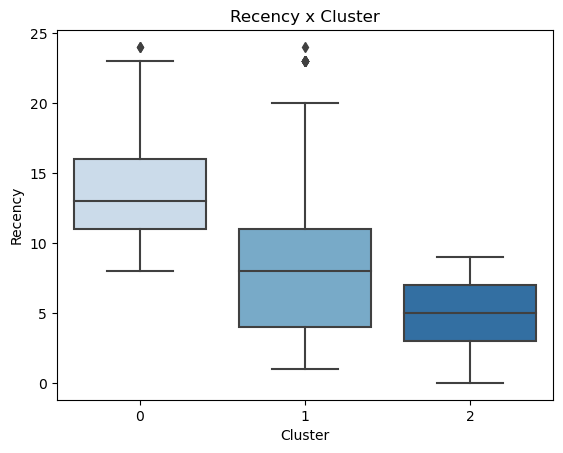

In [15]:
sns.boxplot(data = df_rfm, y = 'Recency', x = 'Cluster', palette='Blues')
plt.title('Recency x Cluster');

Looking at the boxplot, we see that Cluster 0 is the group of customers who have more recent purchases, Cluster 1 are the customers who haven't bought in a while and Cluster 2 is in between.

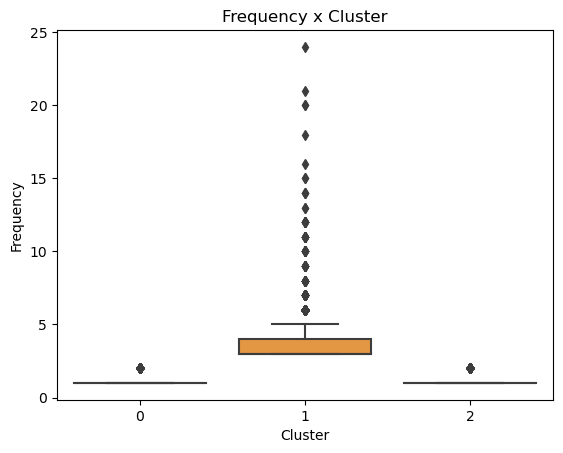

In [16]:
sns.boxplot(data = df_rfm, y = 'Frequency', x = 'Cluster', palette = 'YlOrBr')
plt.title('Frequency x Cluster');

According to the boxplot of Frequency x Cluster, Cluster number 2 is the group of more frequent buyers, and Clusters 0 and 1 apparently have bought only once or twice. Let's look at the specific numbers:

In [17]:
df_rfm.groupby('Cluster').Frequency.describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,36353.0,1.096031,0.294637,1.0,1.0,1.0,1.0,2.0
1,2873.0,3.865994,1.601641,3.0,3.0,3.0,4.0,24.0
2,56194.0,1.097964,0.297269,1.0,1.0,1.0,1.0,2.0


The average number of purchases for both Clusters 1 and 2 is about 1.09, and the maximum number of purchases is 2. So they have indeed only bought once or twice.

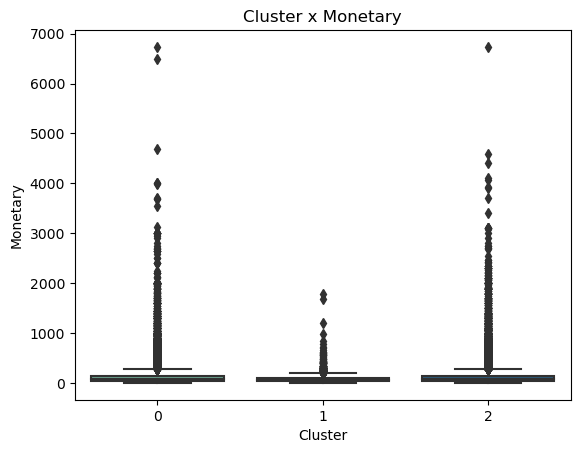

In [18]:
sns.boxplot(data = df_rfm, y = 'Monetary', x = 'Cluster', palette = 'crest')
plt.title('Cluster x Monetary');

With so many outliers it's hard to visualize the scale, let's try to change that.

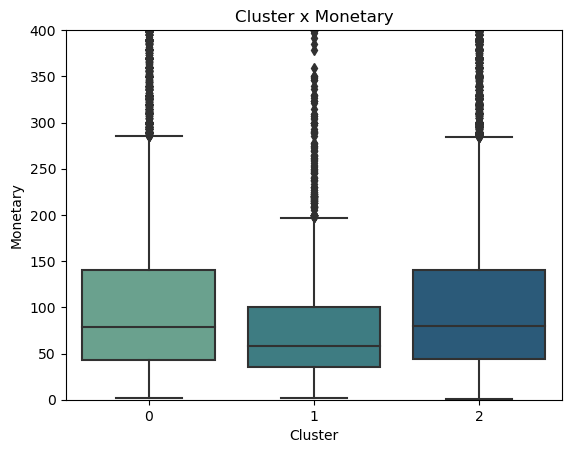

In [19]:
sns.boxplot(data = df_rfm, y = 'Monetary', x = 'Cluster', palette = 'crest')
plt.ylim([0, 400])
plt.title('Cluster x Monetary');

Clusters 0 and 1 have similar average ticket, while customers in Cluster 2 have lower spending, on average.

So, summarizing our findings we have:
- Cluster 0: Most recent buyers, bought only once or twice and higher average ticket.<br><br>
- Cluster 1: Haven't made any recent purchases, bought only once or twice and higher average ticket.<br><br>
- Cluster 2: Intermediate recency, frequent buyers and lower average ticket.

So we could name the clusters for easier identification:
- Cluster 0: New customer<br><br>
- Cluster 1: Lost customer<br><br>
- Cluster 2: Frequent buyer

In [20]:
df_rfm['Cluster'] = df_rfm['Cluster'].map({0: 'New customer', 1: 'Lost customer', 2: 'Frequent buyer'})
df_rfm

,customer_unique_id,Recency,Frequency,Monetary,Cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,4,1,129.90,Frequent buyer
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4,1,18.90,Frequent buyer
2,0000f46a3911fa3c0805444483337064,18,1,69.00,New customer
3,0000f6ccb0745a6a4b88665a16c9f078,11,1,25.99,New customer
4,0004aac84e0df4da2b147fca70cf8255,10,1,180.00,New customer
...,...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,15,2,785.00,New customer
95416,fffea47cd6d3cc0a88bd621562a9d061,9,1,64.89,Frequent buyer
95417,ffff371b4d645b6ecea244b27531430a,19,1,89.90,New customer
95418,ffff5962728ec6157033ef9805bacc48,4,1,115.00,Frequent buyer


In [21]:
df_rfm.groupby('Cluster').agg({'Recency': ['min', 'max', 'mean'],
                               'Frequency': ['min', 'max', 'mean'],
                               'Monetary': ['min', 'max', 'mean']})

Recency                Frequency               Monetary  \
                   min max       mean       min max      mean      min   
Cluster                                                                  
Frequent buyer       0   9   4.990337         1   2  1.097964     0.85   
Lost customer        1  24   8.184128         3  24  3.865994     1.51   
New customer         8  24  13.683547         1   2  1.096031     2.29   

                                    
                   max        mean  
Cluster                             
Frequent buyer  6729.0  125.697899  
Lost customer   1790.0   82.470439  
New customer    6735.0  131.262886

# 4 - Recommendations

So, according to our findings, the recommendations for each group would be:

- Frequent buyers: Upselling or cross-selling strategies to increase average ticket;<br><br>
- New customers: Welcome campaigns with introductory offers and discounts to encourage them to make additional purchases;<br><br>
- Lost customers: Reactivation campaigns with special incentives and offers to bring them back, sending out surveys with additional offers as prize to collect feedback, in order to gain insights on the reasons that made them not return.}

# 5- Conclusion

In this project, we develop an RFM analysis to gain a deeper understanding of our customer base, identify distinct customer segments, and develop tailored strategies to enhance customer engagement, retention, and overall business performance.

Through a systematic exploration of the RFM framework, we examined three crucial dimensions of customer behavior: Recency, Frequency, and Monetary Value. By quantifying these dimensions, we were able to classify our customers into meaningful segments, each characterized by unique patterns of interaction with our products or services.

The insights derived from our RFM analysis revealed our customer behavior could be divided in 3 groups:

- Frequent Buyers: We identified a segment of customers who consistently engage with our offerings. They demonstrated the highest Frequency but had relatively lower Monetary Value. Our strategy for this group emphasized building loyalty through personalized incentives and cross-selling opportunities.<br><br>
- New Customers: Another important segment comprised customers who had made only one or two purchases. We recognized the potential of these individuals to become long-term patrons. To nurture this potential, we deployed welcoming campaigns to encourage them to stick around.<br><br>
- Lost Customers: Among our findings, we uncovered a segment of individuals who had made initial purchases but had not returned. This segment presented an opportunity for re-engagement. Win-back campaigns and feedback collection played a pivotal role in our efforts to rekindle their interest.

Our project exemplifies the value of RFM analysis in driving data-informed decision-making. By segmenting our customer base, we were not only able to tailor our marketing strategies but also allocate resources more efficiently. This targeted approach can lead to enhanced customer satisfaction, increased customer lifetime value, and ultimately, improved business profitability.

It is important to recognize that the journey does not end here. Customer behavior is dynamic, influenced by market trends, seasonality, and evolving preferences. Thus, continuous monitoring and adaptation of our RFM-based strategies will remain integral to the success of the business.

As a next step for this project, we could further divide each one of the groups based on other characteristics such as geographic region or preferred product categories to better understand each customer's purchase habits.

In closing, this project reinforces the notion that RFM analysis is not merely a statistical exercise but a strategic imperative. It empowers us to transform data into actionable insights, fostering meaningful connections with customers and steering the organization toward a future marked by success and customer-centric excellence.